# Linear Regresion
ISLR Linear Regression 참조하고 ISLR에서 제공되는 데이터를 활용하지만, 책 흐름을 전적으로 따라가지는 않는다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d

import sklearn.linear_model as skl_lm
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

## 1. Load Datasets
Advertising 데이터를 활용 (https://www.statlearning.com/resources-first-edition)

In [2]:
# Load Advertising dataset
ad_data = pd.read_csv('./data/Advertising.csv', index_col=0)
ad_data.head(3)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3


In [3]:
# data 정보 확인
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [4]:
# data 통계치 확인
ad_data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


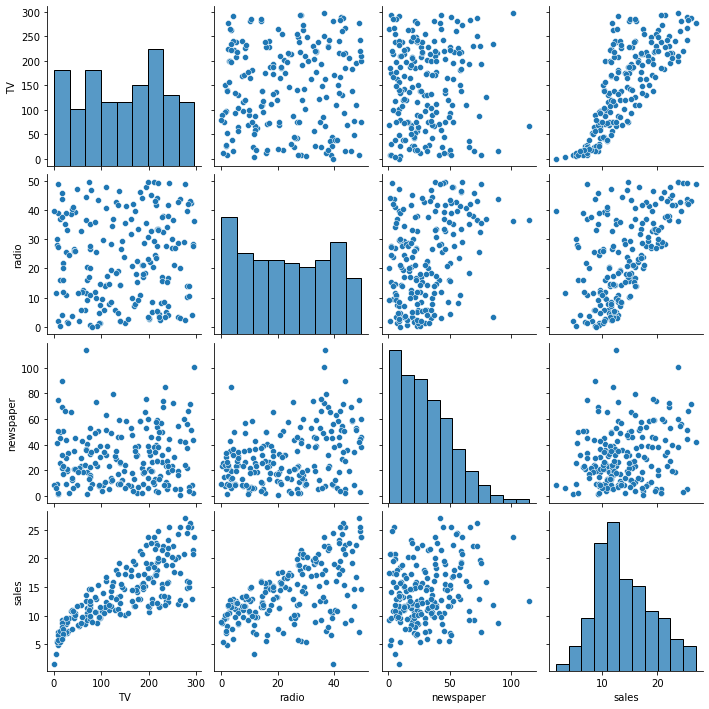

In [5]:
# data 특성을 pairplot으로 간단히 확인
sns.pairplot(ad_data)

----
**TIP)** *데이터 분포 분류*       
    
- Mesokurtic :  첨도가 낮지도 높지도 않은 분포    
- Leptokurtic : 첨도가 큰 분포    
- Platykurtic : 첨도가 낮은 분포    
- Bimodel : 쌍봉 분포 (두개의 극대값)   
- Nagative Skewness (Left-skewed): 오른쪽으로 치우친 분포 (왜도 < 0)     
- Positive Skewness (Right-skewed): 왼쪽으로 치우친 분포 (왜도 > 0)  

----

## 2. Simple Linear Regression

$Y = \beta_{0} + \beta_{1}X$
    
이 장에서는 TV를 X로 sales를 Y로 사용 

### 2-1. seaborn Regression Plot 

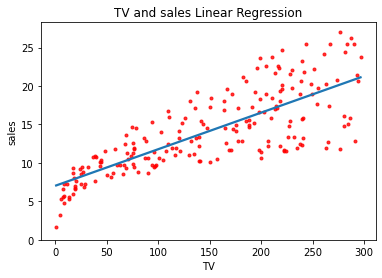

In [6]:
# sns 이용한 간단한 회귀 시각화
sns.regplot(x=ad_data['TV'], y=ad_data['sales'], order=1, ci=None, scatter_kws={'color': 'r', 's': 9})
plt.title('TV and sales Linear Regression')
plt.ylim(ymin=0)

plt.show()

### 2-2. sklearn Regression

In [8]:
# sklearn linear regression model 객체화
regr = skl_lm.LinearRegression()

# X값, y값 선별 
# sales = 𝛽0 + 𝛽1*TV
X = ad_data['TV'].values.reshape(-1, 1)
y = ad_data['sales']

# linear regression 학습
regr.fit(X, y)

# 회귀계수, 절편 값 출력
print('intercept: ', regr.intercept_)    # 절편: 𝛽0
print('coefficient: ', regr.coef_[0])    # 회귀계수: 𝛽1

intercept:  7.032593549127694
coefficient:  0.04753664043301976


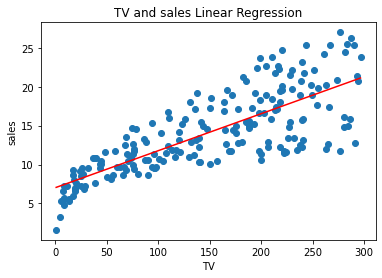

In [9]:
# regression 결과 시각화
plt.scatter(x=ad_data['TV'], y=ad_data['sales'])

X_sample = np.array([[ad_data['TV'].min()], [ad_data['TV'].max()]])
y_pred = regr.predict(X_sample)
plt.plot(X_sample, y_pred, c='red')

plt.xlabel('TV')
plt.ylabel('sales')
plt.title('TV and sales Linear Regression')

plt.show()

### 2-3. 해석

sales = 7.0325 + 0.4753 * TV 

----

**TIP)** *SST, SSE, SSR*

- 편차(Deviation): 관측치가 평균으로부터 떨어져 있는 정도, 즉 평균과의 차이
- 오차(Error): 예측하기 위하여 추정된 값과 실제값의 차이, 즉 예측값이 정확하지 못한 정도
- 잔차(residual): 평균이 아니라 회귀식 등으로 추정된 값과의 차이, 즉 추정된 값이 설명할 수 없어서 아직 남아있는 편차로 편차의 일부

![img_01](./image/regression_01.png)

- SST(Total sun of squares): Y의 총 변동 $(SST = SSE + SSR)$
- SSE(Error sum of squares): 추정값과 실제값 차이(오차)의 제곱, 오차에 대한 변동
- SSR(Residual sum of squares): 직선으로 설명이 불가능한 변동, 직선에 대한 변동
- MSE(Mean Squares Error): 오차가 커서 값이 커지는 건지 데이터가 많아 값이 커지는지 알 수 없는 SSE의 문제를 해결 $(MSE = SSE / (n-2))$
- MSR(Regression Mean Squares): 잔차 평균 제곱의 합 $(MSR = SSR / 1)$
- $R^{2}$(결정계수): 독립변수가 종속변수를 얼마만큼 설명 해주는지를 가리키는 지표, 즉 설명력이며 높을 수록 독립변수가 종속변수를 많이 설명하는 것. 독립변수의 수가 증가하는 것만으로 상승하므로 결정계수만을 가지고 유용성 판단은 무리가 있음 $(R^{2} = SSR / SST, R^{2} = 1 - (SSE / SST))$
- $Adjusted R^{2}$(조정된 경정계수): 독립 변수의 단순 증가가 결정계수를 상승시키는 것을 방지 $(1 - (n-1)(1-R^{2})/(n-p-1))$, ($p:$ 독립변수의 수)

----

In [11]:
# 잔차 계산
y_pred = regr.predict(np.array(ad_data['TV']).reshape(-1, 1))
rasiduals = ad_data['sales'] - y_pred
rasiduals.describe()    # 잔차 통계치 확인

count    2.000000e+02
mean    -1.634248e-15
std      3.250458e+00
min     -8.385982e+00
25%     -1.954522e+00
50%     -1.912655e-01
75%      2.067109e+00
max      7.212369e+00
Name: sales, dtype: float64

In [12]:
# SST, SSE, SSR 값 확인
sst = ((ad_data['sales'] - ad_data['sales'].mean())**2).sum()
sse = ((ad_data['sales'] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst)
print('SSE: ', sse)
print('SSR: ', ssr)
print('SSE+SSR: ', sse+ssr)

SST:  5417.14875
SSE:  2102.5305831313517
SSR:  3314.6181668686504
SSE+SSR:  5417.148750000002


In [13]:
# R^2, Adjusted R^2 값 확인
r2 = ssr/sst
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

R2:  0.6118750508500713
Adjusted R2:  0.6099148238341625


In [14]:
# sklearn r2_score() 함수를 이용하여 R^2값 한번에 산출
r2_score(ad_data['sales'], y_pred)

0.611875050850071

<br/>

**결론)**   

*'TV' 독립변수는 'Sales' 종속 변수에 대해 0.6 정도의 설명력을 가진다.    
이는, 매우 높은 수치이며 현실에서의 문제는 보통 0.2 ~ 0.3 정도의 설명력을 가지는 경우가 대부분이다.*

<br/>


## 3. Multiple Linear Regression

$Y = \beta_{0}X_{0} + \beta_{1}X_{1} + \beta_{2}X_{2}$ $...$

In [15]:
# 변수간 상관관계 파악
ad_data.corr()    # corr() 함수는 기본적으로 피어슨 상관계수를 사용

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<br/>

**결과해석**      

- TV와 sales는 강한 양적 상관관계 (0.78)을 가진다.
- radio와 sales는 뚜렷한 양적 상관관계 (0.57)을 가진다.
- newspaper와 sales는 약한 양적 상관관계 (0.22)를 가진다.
- 3가지 변수를 모두 사용한 모델 regr1과 'TV', 'radio' 2가지 변수를 사용한 regr2 모델을 학습시켜 결과를 확인해 본다.

### 3-1. 모델 학습

In [60]:
# 모든 변수를 활용한 모델 학습
# sklearn linear regression 객체화
regr1 = skl_lm.LinearRegression()

# TV, radio, newspaper 세 변수의 대한 sales 회귀
# 독립, 종속 변수 분할
# sales = 𝛽0*TV + 𝛽1*radio + 𝛽2*newspaper + 𝛽3
X = ad_data[['TV', 'radio', 'newspaper']]
y = ad_data[['sales']]

# linear regression 학습
regr1.fit(X, y)

# 회귀계수, 절편 값 출력
print('intercept: ', regr1.intercept_[0])              # 절편: 𝛽0
print('TV coefficient: ', regr1.coef_[0][0])           # 회귀계수: 𝛽1
print('radio coefficient: ', regr1.coef_[0][1])        # 회귀계수: 𝛽2
print('newspaper coefficient: ', regr1.coef_[0][2])    # 회귀계수: 𝛽3

intercept:  2.9388893694594085
TV coefficient:  0.04576464545539761
radio coefficient:  0.18853001691820453
newspaper coefficient:  -0.00103749304247629


In [61]:
# TV, radio 2가지 변수를 활용한 모델
# sklearn linear regression 객체화
regr2 = skl_lm.LinearRegression()

# TV, radio 두 변수의 대한 sales 회귀
# 독립, 종속 변수 분할
# sales = 𝛽0 + 𝛽1*TV + 𝛽2*radio
X = ad_data[['TV', 'radio']]
y = ad_data[['sales']]

# linear regression 학습
regr2.fit(X, y)

# 회귀계수, 절편 값 출력
print('intercept: ', regr2.intercept_[0])              # 절편: 𝛽0
print('TV coefficient: ', regr2.coef_[0][0])           # 회귀계수: 𝛽1
print('radio coefficient: ', regr2.coef_[0][1])        # 회귀계수: 𝛽2

intercept:  2.9210999124051362
TV coefficient:  0.04575481510107615
radio coefficient:  0.1879942266203092


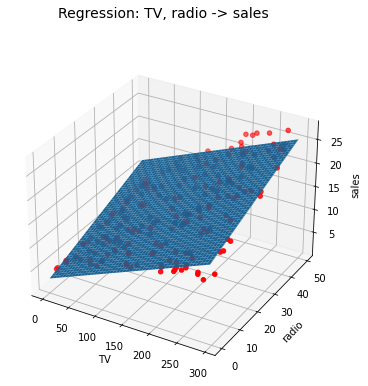

In [62]:
# TV, radio 독립 변수에 대한 sales 종속변수 시각화
fig = plt.figure(figsize=(8, 6))
ax3d = plt.axes(projection="3d")
fig.suptitle('Regression: TV, radio -> sales', fontsize=14)

# 평면 시각화
tv = np.arange(ad_data['TV'].min(), ad_data['TV'].max())             # TV 변수 분포
radio = np.arange(ad_data['radio'].min(), ad_data['radio'].max())    # radio 변수 분포
x1, x2 = np.meshgrid(tv, radio, indexing='xy')    # TV, radio 변수 2차원 격자로 변환
z = np.zeros((radio.size, tv.size))
for (i, j), _ in np.ndenumerate(z):
    z[i, j] = x1[i, j]*regr2.coef_[0][0] + x2[i, j]*regr2.coef_[0][1] + regr2.intercept_[0]    # 학습된 회귀결과에 따라 sales값 결정
ax3d.plot_surface(x1, x2, z)

# 산점도 시각화
ax3d.scatter3D(ad_data['TV'], ad_data['radio'], ad_data['sales'], c='r')

ax3d.set_xlabel('TV')
ax3d.set_ylabel('radio')
ax3d.set_zlabel('sales')

plt.show()

### 3-2. 모델 평가

----
**TIP)** *P-value*    

P-value (유의확률): 귀무가설이 맞다고 가정할 때 얻은 결과보다 극단적인 결과가 실제로 관측될 확률, 특정 값(0.05 or 0.01 등이나 최근 0.005이하의 값에서 '유의미' 하다는 표현을 사용할 것을 권장) 보다 작을 경우 귀무가설을 기각

*But) 의사결정에 절대적인 지표가 아니며 참고 자료 정도의 의미     
(P-value는 귀무가설이 맞다 라는 전제하에 값이므로 대립가설과는 별개이며, 귀무가설이 참일 확률을 뜻하는 것도 아니다.)*

----

In [54]:
# 잔차 계산
y_pred = regr1.predict(ad_data[['TV', 'radio', 'newspaper']])
rasiduals = ad_data[['sales']] - y_pred
rasiduals.describe()    # 잔차 통계치 확인

,sales
count,2.000000e+02
mean,-9.947598e-16
std,1.672757e+00
min,-8.827687e+00
25%,-8.908135e-01
50%,2.418018e-01
75%,1.189319e+00
max,2.829223e+00


In [55]:
# SST, SSE, SSR 값 확인
sst = ((ad_data[['sales']] - ad_data[['sales']].mean())**2).sum()
sse = ((ad_data[['sales']] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst.values[0])
print('SSE: ', sse.values[0])
print('SSR: ', ssr)
print('SSE+SSR: ', sse.values[0]+ssr)

SST:  5417.14875
SSE:  556.8252629021872
SSR:  4860.323487097819
SSE+SSR:  5417.148750000007


In [56]:
# R^2, Adjusted R^2 값 확인
r2 = ssr/(sst.values[0])
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

R2:  0.8972106381789533
Adjusted R2:  0.896691499987938


In [57]:
# sklearn r2_score() 함수를 이용하여 R^2값 한번에 산출
r2_score(ad_data['sales'], y_pred)

0.8972106381789522

In [58]:
# Stats model 활용 모델 학습 및 결과 확인
lm_mul = smf.ols(formula='sales ~ TV + radio + newspaper', data=ad_data).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           1.58e-96
Time:                        14:12:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<br/>

**결과해석**      

- F statistic P-value가 매우 작으므로 (1.58e-96) 모델은 유효함 (최소한 1개 이상의 variable이 response와 관련 있음)
- TV와 radio의 P-value는 의미 있으나, newspaper의 p-value는 0.86에 달하므로 "newspaper가 response와 관련이 없다"라는 null-hypothesis를 거부 할 수 없음. 따라서 newspaper 변수를 모델에 포함하기는 적합하지 않음
- R-squared가 0.89로 simple regression (0.612) 보다 증가. 최소한 Simple Linear Regression 보다 Multi Linear Regression이 response를 더 잘 설명(예측) 한다고 생각할 수 있음

In [59]:
# TV, radio 두가지의 변수를 사용한 모델의 결과 확인
y_pred = regr2.predict(ad_data[['TV', 'radio']])
rasiduals = ad_data[['sales']] - y_pred

# SST, SSE, SSR 값 확인
sst = ((ad_data[['sales']] - ad_data[['sales']].mean())**2).sum()
sse = ((ad_data[['sales']] - y_pred)**2).sum()
ssr = ((y_pred - ad_data['sales'].mean())**2).sum()
print('SST: ', sst.values[0])
print('SSE: ', sse.values[0])
print('SSR: ', ssr)
print('SSE+SSR: ', sse.values[0]+ssr)

# R^2, Adjusted R^2 값 확인
r2 = ssr/(sst.values[0])
adjusted_r2 = 1 - (len(ad_data['sales']) - 1)*(1 - r2)/(len(ad_data['sales']) - 1 - 1)
print('R2: ', r2)
print('Adjusted R2: ', adjusted_r2)

SST:  5417.14875
SSE:  556.9139800676184
SSR:  4860.2347699323855
SSE+SSR:  5417.148750000004
R2:  0.8971942610828962
Adjusted R2:  0.8966750401792745


<br/>

**결론)**       

*'TV', 'radio' 두 가지의 변수를 활용하여 구축된 모델은 sales를 가장 잘 설명할 수 있을 것이다.*

<br/>

----    
**TIP)** *data scaling*    
    
데이터 분포별 정규화 비교 참고자료:     
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

- KDE(Kernel Density Estimation): non-parametric 밀도추정 방법 중 하나로서, 커널함수(Kernel Function)를 이용하여 히스토그램 방법의 문제점을 개선한 방법  
- Kernel Function: 원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수 (ex. 가우시안 함수), 주로 커널함수는 Epanechnikov, Gaussian을 사용

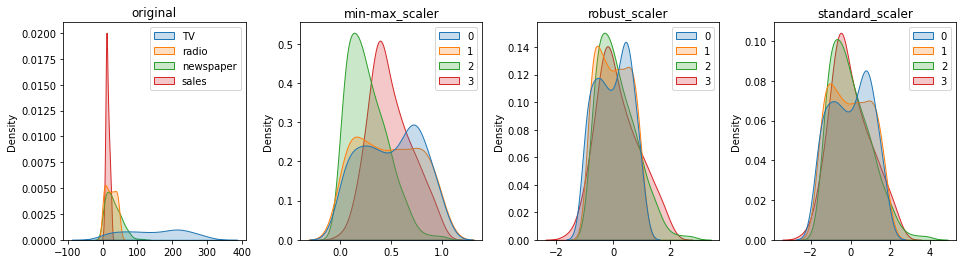

In [63]:
# 스케일링 모듈들 객체화
nm_scaler = MinMaxScaler()
rb_scaler = RobustScaler()
st_scaler = StandardScaler()

# 데이터 스케일링 수행
nm_norm_X = nm_scaler.fit_transform(ad_data)
rb_norm_X = rb_scaler.fit_transform(ad_data)
st_norm_X = st_scaler.fit_transform(ad_data)

SCALER2DATA = {'original': ad_data,
               'min-max_scaler': nm_norm_X, 
               'robust_scaler': rb_norm_X,
               'standard_scaler': st_norm_X}

# 데이터 KDE 시각화
fig, axs = plt.subplots(1, 4, figsize=[16, 4])
fig.subplots_adjust(wspace=0.3)
for i, (k, v) in enumerate(SCALER2DATA.items()):
    sns.kdeplot(data=v, shade=True, ax=axs[i], label=['TV', 'radio', 'newspaper', 'sales'])
    axs[i].set_title(k)
    
plt.show()

----